In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2022-12-07 14:01:01.150634: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 14:01:01.536236: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-07 14:01:01.536271: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-07 14:01:02.853982: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(
            units=4,
            activation='relu'
        )
        self.hidden_2 = tf.keras.layers.Dense(
            units=4,
            activation='relu'
        )
        self.hidden_3 = tf.keras.layers.Dense(
            units=4,
            activation='relu'
        )
        self.output_layer = tf.keras.layers.Dense(
            units=1,
            activation='sigmoid'
        )

    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)

        return self.output_layer(h)

In [3]:
tf.random.set_seed(1)

model = MyModel()
model.build(input_shape=(None, 2))

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  12        
                                                                 
 dense_1 (Dense)             multiple                  20        
                                                                 
 dense_2 (Dense)             multiple                  20        
                                                                 
 dense_3 (Dense)             multiple                  5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


2022-12-07 14:04:58.930756: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-07 14:04:58.930844: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: harsh-IdeaPad-Gaming3-15ARH05D
2022-12-07 14:04:58.930864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: harsh-IdeaPad-Gaming3-15ARH05D
2022-12-07 14:04:58.931019: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-12-07 14:04:58.931312: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  515.65.01  Release Build  (dvs-builder@U16-T11-05-2)  Wed Jul 20 13:54:56 UTC 2022
GCC version:

In [4]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [5]:
np.random.seed(1)

x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

In [6]:
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=2, verbose=2)

Epoch 1/200
50/50 - 1s - loss: 0.6929 - binary_accuracy: 0.4500 - val_loss: 0.6903 - val_binary_accuracy: 0.5400 - 808ms/epoch - 16ms/step
Epoch 2/200
50/50 - 0s - loss: 0.6917 - binary_accuracy: 0.5200 - val_loss: 0.6892 - val_binary_accuracy: 0.6400 - 159ms/epoch - 3ms/step
Epoch 3/200
50/50 - 0s - loss: 0.6908 - binary_accuracy: 0.5500 - val_loss: 0.6883 - val_binary_accuracy: 0.6800 - 142ms/epoch - 3ms/step
Epoch 4/200
50/50 - 0s - loss: 0.6899 - binary_accuracy: 0.5900 - val_loss: 0.6874 - val_binary_accuracy: 0.6900 - 129ms/epoch - 3ms/step
Epoch 5/200
50/50 - 0s - loss: 0.6889 - binary_accuracy: 0.6700 - val_loss: 0.6864 - val_binary_accuracy: 0.6800 - 128ms/epoch - 3ms/step
Epoch 6/200
50/50 - 0s - loss: 0.6879 - binary_accuracy: 0.6600 - val_loss: 0.6854 - val_binary_accuracy: 0.6800 - 149ms/epoch - 3ms/step
Epoch 7/200
50/50 - 0s - loss: 0.6868 - binary_accuracy: 0.6600 - val_loss: 0.6843 - val_binary_accuracy: 0.6800 - 148ms/epoch - 3ms/step
Epoch 8/200
50/50 - 0s - loss: 0.

**WRITING CUSTOM KERAS LAYERS**

In [8]:
# consider a layer that computes [w(x + epsilon) + b]

class NoisyLayer(tf.keras.layers.Layer):
    def __init__(self, output_dim, noise_stddev=0.1, **kwargs):
        self.output_dim = output_dim
        self.noise_stddev = noise_stddev
        super(NoisyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(name='weight', shape=(input_shape[1], self.output_dim), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(self.output_dim, ), initializer='zeros', trainable=True)
    
    def call(self, inputs, training=False):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(shape=(batch, dim), mean=0.0, stddev=self.noise_stddev)
            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        
        z = tf.matmul(noisy_inputs, self.w) + self.b
        return tf.keras.activations.relu(z)

    def get_config(self):
        config = super(NoisyLayer, self).get_config()
        config.update({'output_dim': self.output_dim, 'noise_stddev': self.noise_stddev})

        return config

In [18]:
tf.random.set_seed(1)
noisy_layer = NoisyLayer(4)
noisy_layer.build(input_shape=(None, 4))

x = tf.zeros(shape=(1, 4))
tf.print(noisy_layer(x, training=True))

[[0 0.00263729622 0 0]]


In [19]:
config = noisy_layer.get_config()
new_layer = NoisyLayer.from_config(config)
tf.print(new_layer(x, training=True))

[[0.00637202663 0 0.00585976196 0]]


In [20]:
tf.random.set_seed(1)

model = tf.keras.Sequential([
    NoisyLayer(4, noise_stddev=0.1),
    tf.keras.layers.Dense(
        units=4,
        activation='relu'
    ),
    tf.keras.layers.Dense(
        units=4,
        activation='relu'
    ),
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
])

model.build(input_shape=(None, 2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 noisy_layer_10 (NoisyLayer)  (None, 4)                12        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


   46/20000 [..............................] - ETA: 22s  

/tmp/ipykernel_20895/1463024049.py:31: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 [==============================] - 18s 882us/step


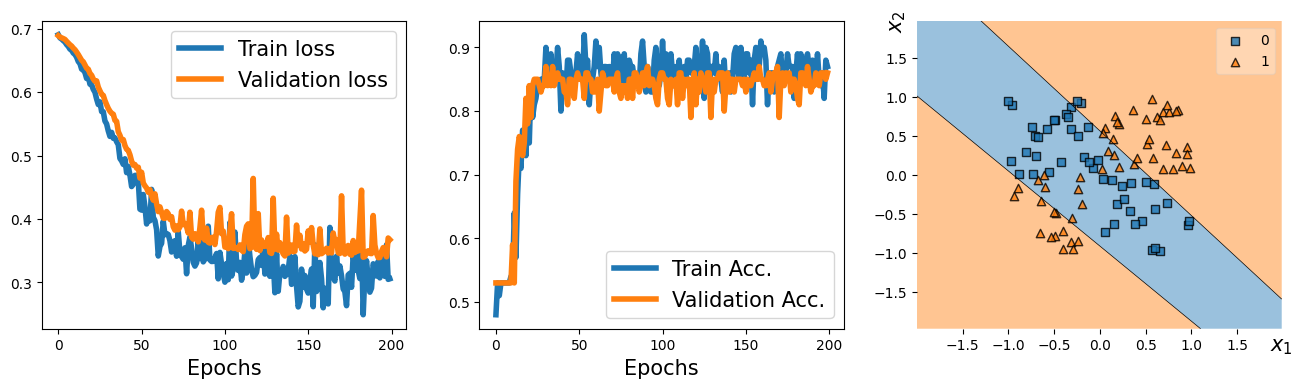

In [22]:
# compile
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)


# fit
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=2, verbose=0)

# for visualization
from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()